## Guided Example - Supervised Learning: Random Forest Model - Reference Solution
Link to Checkpoint:https://courses.thinkful.com/dsbc-random-forest-v1/checkpoint/6  

Updated on 07NOV2020

In this challenge you will implement a random forest model on the heart disease data set from the UCI ML database. You will complete code writing in your own Jupyter notebook and submit a link to it in the last question. The other questions will be based on your findings within your notebook, so be sure to have it open as you work through this challenge.

## Steps:
1. Download the data from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data) and read it in using pandas.read_csv() and rename the columns based on the list provided below.  

`df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data')`
`col_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']`
`df.columns = col_names`

2. Replace '?' with NaN and drop nas. 
`df = df.replace('?', np.NaN).dropna()`

3. Assign the X and y data, where y is the class column and X is all the features.
4. Apply the standard scaler from sklearn to the X data to scale normalize all the features. 
5. Split the data into 75/25 training and testing subsets.
6. Fit a Random Forest Classifier with 100 estimators and random state = 1, print the classification report for the test set.
7. Fit a Random Forest Classifier with 500 estimators and random state = 1, print the classification report for the test set.  
Notice the model fit with 500 estimators is only slightly improved in model metrics of the classification report. Now, let's implement a grid search to identify the best values for the random forest hyperparameters.
8. Implement the grid search using this code:
`from sklearn.model_selection import GridSearchCV`
`param_grid = {`
    `'bootstrap': [True, False],`
    `'max_depth': [80, 90, 100, 110],`
    `'max_features': [2, 3],`
    `'min_samples_leaf': [3, 4, 5],` 
    `'min_samples_split': [8, 10, 12],` 
    `'n_estimators': [100, 500, 1000]` 
`}`
`rf = RandomForestClassifier()`
`grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)`
`grid_search.fit(X_train, y_train)`
`grid_search.best_params_`
9. Apply the best hyperparameters in a new random forest classifier model and print the classification report.
10. Print out the confusion matrix for the final model as well.
11. Review the feature importances from the model as well.


In [9]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Load the data and assign the column headings

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data')
df

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
col_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']
df.columns = col_names
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
age         302 non-null float64
sex         302 non-null float64
cp          302 non-null float64
trestbps    302 non-null float64
chol        302 non-null float64
fbs         302 non-null float64
restecg     302 non-null float64
thalach     302 non-null float64
exang       302 non-null float64
oldpeak     302 non-null float64
slope       302 non-null float64
ca          302 non-null object
thal        302 non-null object
class       302 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [12]:
#### Review objects
df.ca.value_counts()

0.0    175
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [13]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     17
?        2
Name: thal, dtype: int64

In [14]:
# Replace '?' with NaN and drop 
df = df.replace('?', np.NaN).dropna()
df.shape

(296, 14)

In [15]:
# define X and y 
X=df.drop(['class'], axis=1)
y=df['class']
#apply the standard scaler
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
#split into train and test subset
y=y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [21]:
#fit a RF model with 100 estimators
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

t = time.process_time()
clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
elapsed_time = time.process_time() - t
print('Time for Model Fitting:'+str(elapsed_time))
model_res = clf.fit(X_train, y_train)

#predict the test set
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)

#print the classification report
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(y_test, y_pred, target_names=target_names))

Time for Model Fitting:0.00011299999999891952
              precision    recall  f1-score   support

     class 0       0.64      0.90      0.74        39
     class 1       0.00      0.00      0.00         8
     class 2       0.50      0.07      0.12        14
     class 3       0.33      0.11      0.17         9
     class 4       0.00      0.00      0.00         4

    accuracy                           0.50        74
   macro avg       0.29      0.22      0.21        74
weighted avg       0.47      0.50      0.44        74



In [22]:
#Fit an RF model with 500 classifiers
clf = RandomForestClassifier(n_estimators=500, random_state = 1,n_jobs=-1)
elapsed_time = time.process_time() - t
print('Time for Model Fitting:'+str(elapsed_time))
model_res = clf.fit(X_train, y_train)

#predict the test set
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)

#print the classification report
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(y_test, y_pred, target_names=target_names))

Time for Model Fitting:0.3265089999999997
              precision    recall  f1-score   support

     class 0       0.66      0.90      0.76        39
     class 1       0.00      0.00      0.00         8
     class 2       0.50      0.14      0.22        14
     class 3       0.50      0.11      0.18         9
     class 4       0.33      0.25      0.29         4

    accuracy                           0.53        74
   macro avg       0.40      0.28      0.29        74
weighted avg       0.52      0.53      0.48        74



In [34]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  2.2min finished


{'bootstrap': False,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [35]:
clf = RandomForestClassifier(bootstrap = False,
 max_depth= 90,
 max_features= 3,
 min_samples_leaf= 4,
 min_samples_split= 12,
 n_estimators= 100,n_jobs=-1)

model_res = clf.fit(X_train, y_train)

#predict the test set
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)

#print the classification report
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.64      0.95      0.76        39
     class 1       0.00      0.00      0.00         8
     class 2       0.25      0.07      0.11        14
     class 3       0.50      0.11      0.18         9
     class 4       1.00      0.25      0.40         4

    accuracy                           0.54        74
   macro avg       0.48      0.28      0.29        74
weighted avg       0.50      0.54      0.47        74



Confusion matrix, without normalization
[[37  2  0  0  0]
 [ 7  0  1  0  0]
 [ 8  4  1  1  0]
 [ 4  2  2  1  0]
 [ 2  1  0  0  1]]
Normalized confusion matrix
[[0.95 0.05 0.   0.   0.  ]
 [0.88 0.   0.12 0.   0.  ]
 [0.57 0.29 0.07 0.07 0.  ]
 [0.44 0.22 0.22 0.11 0.  ]
 [0.5  0.25 0.   0.   0.25]]


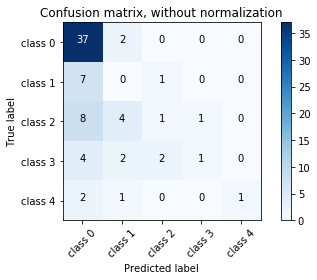

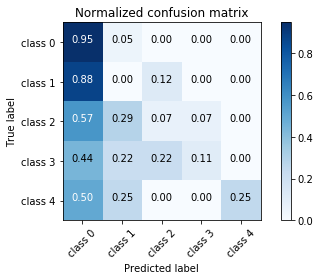

In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

13


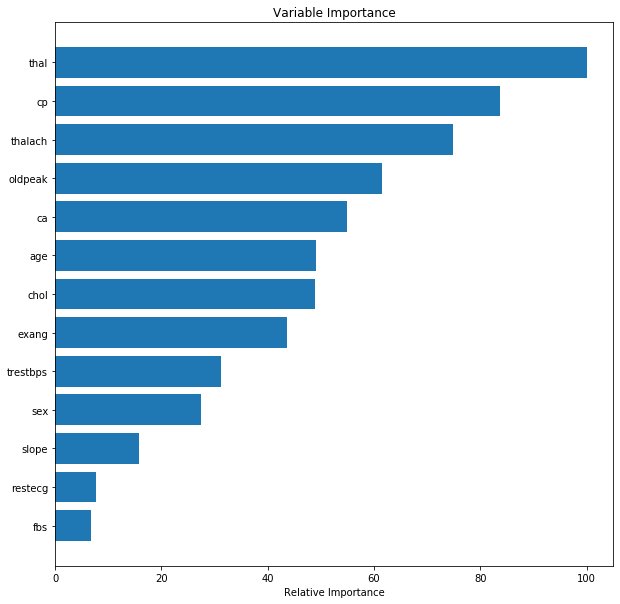

In [38]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()